https://colab.research.google.com/drive/1BVsgIGP5CPVb52texhdxL5_0y-PQIzso?usp=sharing

# Install Requireed Packages

In [ ]:
%%capture
!pip install scikit-fuzzy

# Import Requireed Packages

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variable

## Temprature in range -10 to 50

In [ ]:
temperature = ctrl.Antecedent(np.arange(-10, 51, 1), 'temperature')

In [ ]:
temperature.automf(7, names=['very very cold', 'very cold', 'cold', 'medium', 'hot', 'very hot', 'very very hot'])

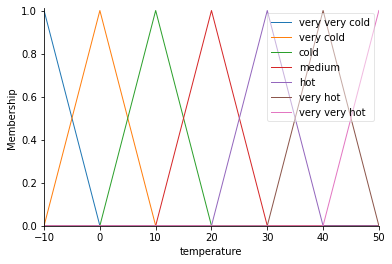

In [ ]:
temperature.view()

## Humidity in range 0 to 100

In [ ]:
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')

In [ ]:
humidity['very low'] = fuzz.trimf(humidity.universe, [0, 0, 33])
humidity['medium'] = fuzz.trimf(humidity.universe, [0, 33, 66])
humidity['high'] = fuzz.trimf(humidity.universe, [33, 66, 100])
humidity['very high'] = fuzz.trimf(humidity.universe, [66, 100, 100])

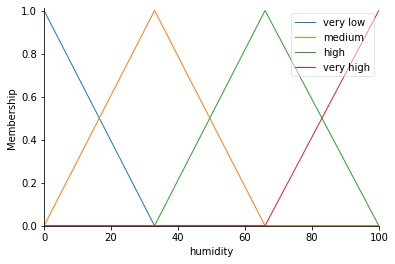

In [ ]:
humidity.view()

## velocity in range 0 to 20

In [ ]:
velocity = ctrl.Consequent(np.arange(0, 21, 1), 'velocity')

In [ ]:
velocity['very low'] = fuzz.trimf(velocity.universe, [0, 0, 4])
velocity['low'] = fuzz.trimf(velocity.universe, [0, 4, 8])
velocity['medium'] = fuzz.trimf(velocity.universe, [4, 8, 12])
velocity['high'] = fuzz.trimf(velocity.universe, [8, 12, 16])
velocity['very high'] = fuzz.trimf(velocity.universe, [12, 16, 20])
velocity['very very high'] = fuzz.trimf(velocity.universe, [16, 20, 20])

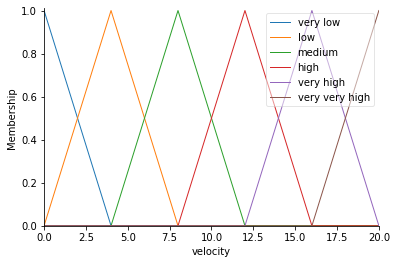

In [ ]:
velocity.view()

# Fuzzy rules


In [ ]:
rule1 = ctrl.Rule((temperature['very very cold'] & humidity['very low'])|
                  (temperature['very very cold'] & humidity['medium'])|
                  (temperature['very very cold'] & humidity['high'])|
                  (temperature['very very cold'] & humidity['very high'])
                  , velocity['very low'])

rule2 = ctrl.Rule((temperature['very cold'] & humidity['very low'])|
                  (temperature['very cold'] & humidity['medium'])|
                  (temperature['very cold'] & humidity['high'])|
                  (temperature['very cold'] & humidity['very high']),
                  velocity['very low'])

rule3 = ctrl.Rule((temperature['cold'] | temperature['medium']) &
                  humidity['very low'],
                  velocity['low'])

rule4 = ctrl.Rule((temperature['medium'] | temperature['hot'])&
                  (humidity['medium'] | humidity['high']), 
                  velocity['medium'])

rule5 = ctrl.Rule(temperature['hot']&humidity['very high'], 
                  velocity['high'])

rule6 = ctrl.Rule((temperature['very hot'] & humidity['very low'])|
                  (temperature['very hot'] & humidity['medium'])|
                  (temperature['very hot'] & humidity['high'])|
                  (temperature['very hot'] & humidity['very high']), 
                  velocity['very high'])

rule7 = ctrl.Rule((temperature['very very hot'] & humidity['very low'])|
                  (temperature['very very hot'] & humidity['medium'])|
                  (temperature['very very hot'] & humidity['high'])|
                  (temperature['very very hot'] & humidity['very high']),
                  velocity['very very high'])



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa859b7c5d0>)

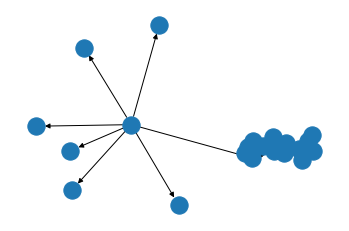

In [ ]:
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa859adde10>)

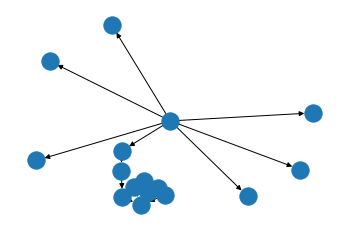

In [ ]:
rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa859a55350>)

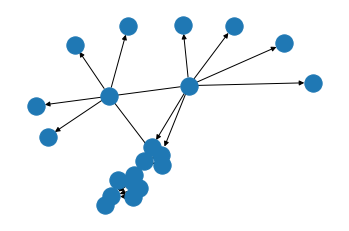

In [ ]:
rule3.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa859a25150>)

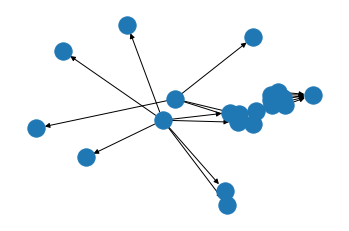

In [ ]:
rule4.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa859960610>)

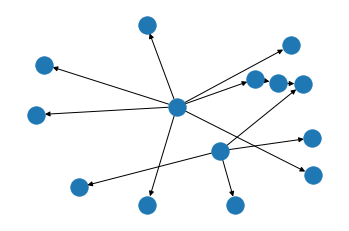

In [ ]:
rule5.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa859e2a050>)

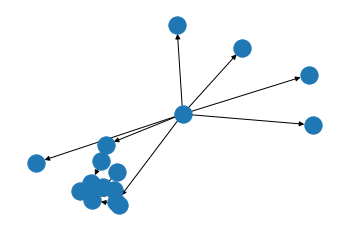

In [ ]:
rule6.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa859b92890>)

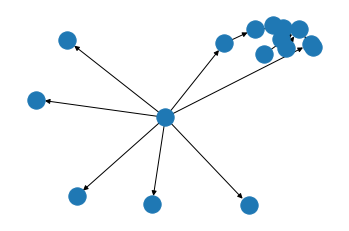

In [ ]:
rule7.view()

# Control System Creation and Simulation

In [ ]:
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])

In [ ]:
fan_velocity = ctrl.ControlSystemSimulation(fan_ctrl)

In [ ]:
fan_velocity.input['temperature'] = 0
fan_velocity.input['humidity'] = 20

fan_velocity.compute()

1.4817742643829603


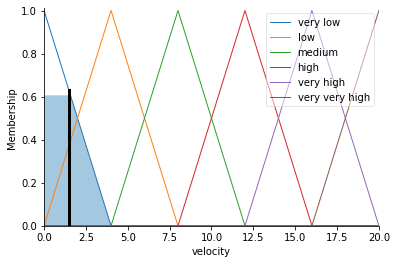

In [ ]:
print(fan_velocity.output['velocity'])
velocity.view(sim=fan_velocity)

In [ ]:
fan_velocity.input['temperature'] = 35
fan_velocity.input['humidity'] = 88

fan_velocity.compute()

12.380216273430282


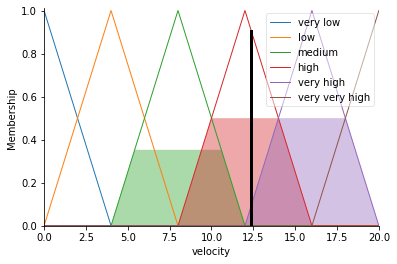

In [ ]:
print(fan_velocity.output['velocity'])
velocity.view(sim=fan_velocity)